In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('KNN_Project_Data')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


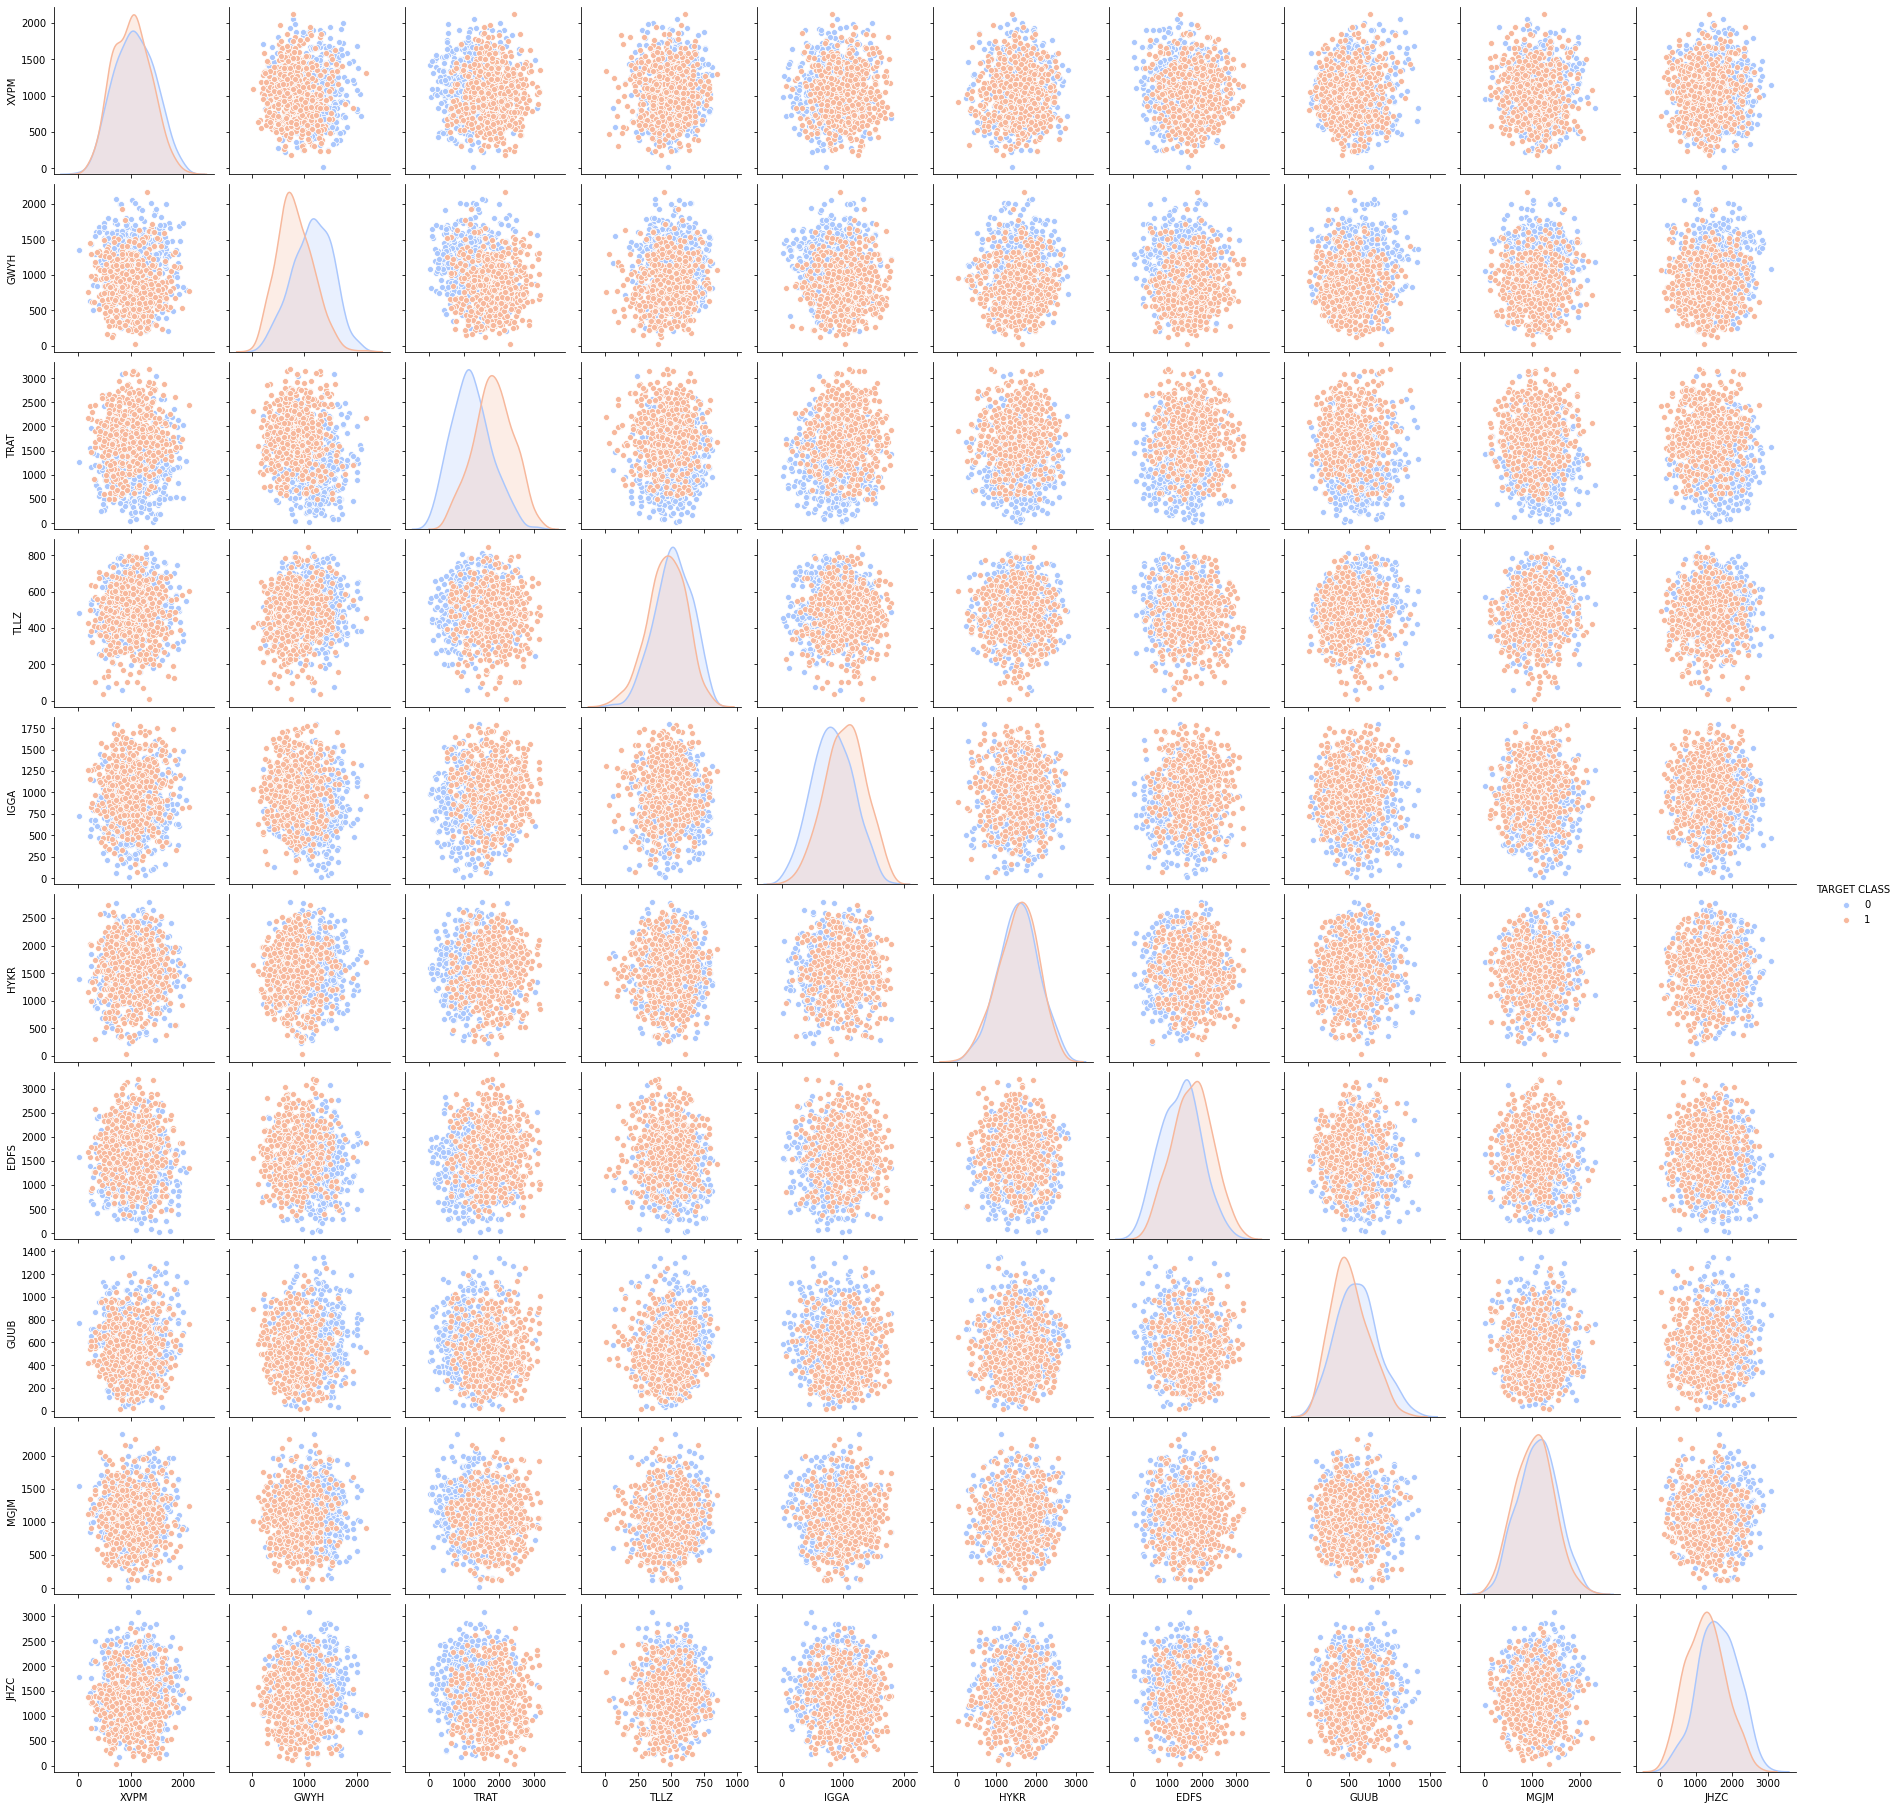

In [51]:
plt.figsize=(8,8)
sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm')

In [0]:
#standardize the variables

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [45]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_feat = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [0]:
df_feat = pd.DataFrame(scaled_feat,columns = df.columns[:-1])

In [48]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   XVPM    1000 non-null   float64
 1   GWYH    1000 non-null   float64
 2   TRAT    1000 non-null   float64
 3   TLLZ    1000 non-null   float64
 4   IGGA    1000 non-null   float64
 5   HYKR    1000 non-null   float64
 6   EDFS    1000 non-null   float64
 7   GUUB    1000 non-null   float64
 8   MGJM    1000 non-null   float64
 9   JHZC    1000 non-null   float64
dtypes: float64(10)
memory usage: 78.2 KB


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=1)

In [0]:
knn.fit(X_train,y_train)

In [0]:
predictions = knn.predict(X_test)
predictions

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71       145
           1       0.73      0.74      0.73       155

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



[[102  43]
 [ 41 114]]


In [0]:
#elbow method to pick a good K Value


In [0]:
error_rate = []
for i in range(1,41):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

error_rate

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41),error_rate,color='blue',linestyle='--',marker='o',
         markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [52]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[118  27]
 [ 24 131]]


              precision    recall  f1-score   support

           0       0.83      0.81      0.82       145
           1       0.83      0.85      0.84       155

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

